# Grating pattern calculation
===========================================

- author Sylvie Dagoret-Campagne
- Date June 28th 2016


## Monocam studies with Ronchi Grating

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
import numpy as np
import astropy

In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time, TimezoneInfo

## Constants for grating
------------------------------

These are assumptions taken for the Ronchi Grating

In [100]:
N=1000                      # number of slit
nblines_per_mm=200/u.mm     # grating lines densities 
b=0.0025*u.mm               # slit width (assume 50% hole 50% filled)
a=1./nblines_per_mm         # line pitch

In [102]:
L=N*a                       # grating width

In [104]:
a

<Quantity 0.005 mm>

## Light Diffraction pattern by a single slit of width b
-----------------------------------------------------------


$
\beta(\theta,\lambda)=\frac{b\pi}{\lambda}\sin\theta
$



$
I(\theta,\lambda)= I_0 |\frac{\sin \beta(\theta,\lambda) }{\beta(\theta,\lambda)}  |^2
$


#### The single slit diffraction formula

In [105]:
def Diff_OneSlit(sin_theta,wl=500*u.nm,wsl=2.5*u.um):
    '''
    input :
       sin_theta : numpy array of sinus of diffraction angles 
       wl        : wavelength that should be expressed in u.nm
       wsl       : slit width that should be given in u.mm
    '''
    
    beta=wsl*np.pi/wl*sin_theta
    thearg=np.array(beta.decompose())   
    intensity=np.sinc(thearg/np.pi)**2
    return intensity
      

#### the input diffracted angles

In [106]:
sin_theta=np.linspace(-0.1,0.1,100)

In [107]:
I0=Diff_OneSlit(sin_theta,wl=300*u.nm)
I1=Diff_OneSlit(sin_theta,wl=400*u.nm)
I2=Diff_OneSlit(sin_theta,wl=500*u.nm)
I3=Diff_OneSlit(sin_theta,wl=600*u.nm)
I4=Diff_OneSlit(sin_theta,wl=800*u.nm)
I5=Diff_OneSlit(sin_theta,wl=1000*u.nm)

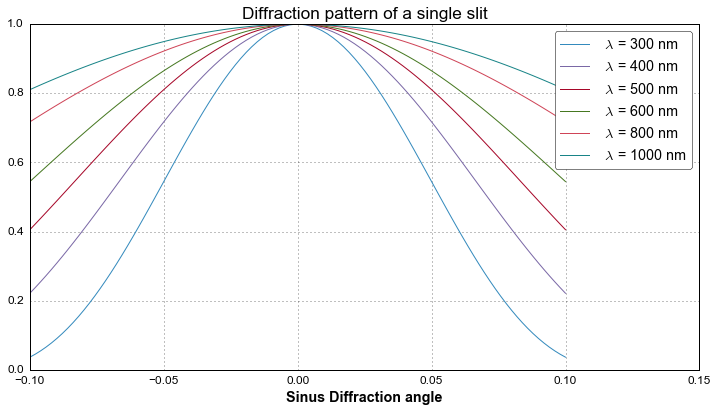

In [108]:
plt.figure(figsize=(12.,6.))
plt.plot(sin_theta,I0,label=' $\lambda$ = 300 nm')
plt.plot(sin_theta,I1,label=' $\lambda$ = 400 nm')
plt.plot(sin_theta,I2,label=' $\lambda$ = 500 nm')
plt.plot(sin_theta,I3,label=' $\lambda$ = 600 nm')
plt.plot(sin_theta,I4,label=' $\lambda$ = 800 nm')
plt.plot(sin_theta,I5,label=' $\lambda$ = 1000 nm')
plt.xlabel('Sinus Diffraction angle')
plt.title('Diffraction pattern of a single slit')
plt.legend()
plt.show()



## Light diffraction and interference by a multi-slit grating


$
I(\theta,\lambda)= I_0^2 \times
|\frac{\sin \alpha(\theta,\lambda)N} {\sin \alpha(\theta,\lambda)}  |^2
$



In [115]:
def Interf_MultiSlit(sin_theta,wl=500*u.nm,lsp=5*u.um,N=1000):
    '''
    input :
       sin_theta : numpy array of sinus of diffraction angles 
       wl        : wavelength that should be expressed in u.nm
       lsp       : line spacing u.um
       N         : total number of lines contributing to the interference
    '''
    
    alpha=lsp*np.pi/wl*sin_theta
    thearg=np.array(alpha.decompose())   
    intensity=np.sinc(thearg/np.pi)**2
    return intensity
      